# EM-DAT Data Cleanup 1900-2023 

CSCI 4622 | Team Disaster

This notebook is responsible for the cleanup process of the EM-DAT database from 1900-2023.

# Data Acquisition

In [1]:
# Import necessary libraries for Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/public_emdat_1900-2024.csv'
data = pd.read_csv(file_path)
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1098720.0,2.730451,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2003-07-01,2023-09-25


# Data Understanding

In [2]:
# Basic data information
data.info()

# Display basic statistics
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26793 entries, 0 to 26792
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     26793 non-null  object 
 1   Historic                                   26793 non-null  object 
 2   Classification Key                         26793 non-null  object 
 3   Disaster Group                             26793 non-null  object 
 4   Disaster Subgroup                          26793 non-null  object 
 5   Disaster Type                              26793 non-null  object 
 6   Disaster Subtype                           26793 non-null  object 
 7   External IDs                               2492 non-null   object 
 8   Event Name                                 8398 non-null   object 
 9   ISO                                        26793 non-null  object 
 10  Country               

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
count,26793,26793,26793,26793,26793,26793,26793,2492,8398,26793,...,4.200000e+01,4.200000e+01,1.138000e+03,1.125000e+03,5.765000e+03,5.722000e+03,26368.000000,8485,26793,26793
unique,26793,2,67,2,9,32,67,1884,3631,232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6959,2617,142
top,1900-0003-USA,No,tec-tra-roa-roa,Natural,Hydrological,Flood,Road,GLIDE:CW-2012-000006,Cholera,CHN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":925,""adm1_name"":""Taiwan Sheng""}]",2003-07-01,2023-09-25
freq,1,16017,2925,17244,6852,6007,2925,29,505,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,9374,24985
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.367314e+06,6.639464e+06,9.205839e+05,1.302049e+06,8.026137e+05,1.281373e+06,57.476863,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.587693e+07,1.699672e+07,3.672429e+06,4.914277e+06,4.952952e+06,7.115101e+06,23.067487,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.400000e+01,1.310000e+02,3.400000e+01,4.800000e+01,2.000000e+00,3.000000e+00,2.730451,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.312500e+04,9.772000e+04,5.000000e+04,9.533300e+04,8.000000e+03,1.720800e+04,44.696722,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.445000e+05,5.375475e+05,1.750000e+05,2.681860e+05,6.000000e+04,1.246500e+05,59.033144,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.133000e+06,4.422531e+06,5.475000e+05,8.420930e+05,3.380000e+05,6.244882e+05,75.350386,NaN,NaN,NaN


# Data Cleaning

External IDs                                 24301
Event Name                                   18395
Location                                      2470
Origin                                       22292
Associated Types                             22827
AID Contribution ('000 US$)                  26005
Magnitude                                    21665
Magnitude Scale                              10016
Latitude                                     23997
Longitude                                    23997
River Basin                                  25389
Start Month                                    504
Start Day                                     4052
End Month                                      812
End Day                                       3963
Total Deaths                                  5499
No. Injured                                  18040
No. Affected                                 15676
No. Homeless                                 24119
Total Affected                 

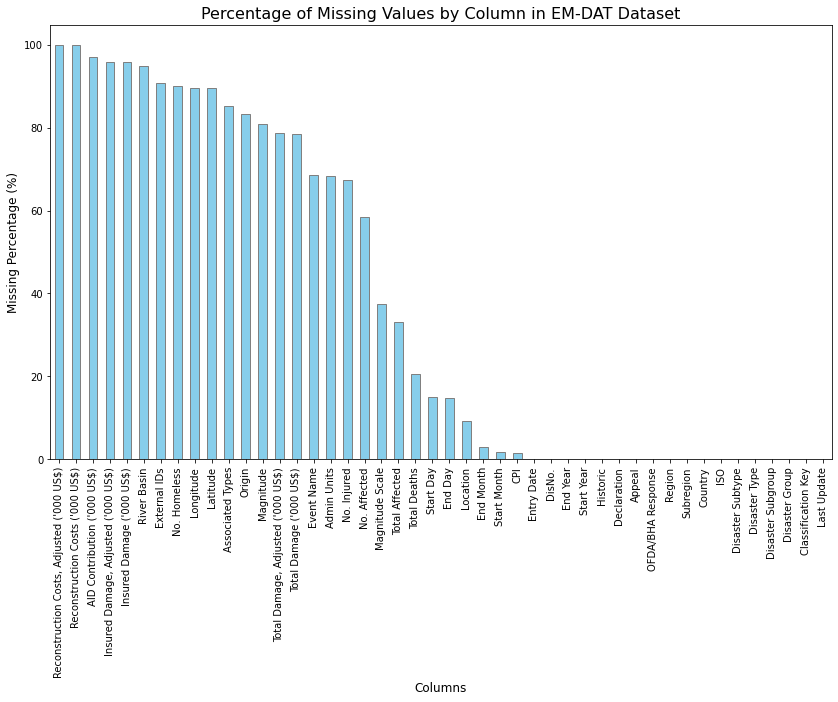

In [3]:
# --------------------- Check for missing values ---------------------#

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

print()
# Check for duplicates
duplicates = data.duplicated().sum()
if duplicates == 0:
    print("No duplicates!")
    
else:
    print("Remove duplicates!")
    
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100

# Plot the missing data percentage for each column as a bar chart
plt.figure(figsize=(14, 8))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='gray')
plt.title('Percentage of Missing Values by Column in EM-DAT Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [4]:
# Remove features that do not meet the threshold of missing values
missing_threshold = 0.60

features = data.columns
number_dropped_cols = 0

dropped_features = []

for feature in features:
    if (data[feature].isnull().sum() / len(data)) > missing_threshold:
        data = data.drop(feature, axis=1)
        number_dropped_cols += 1
        dropped_feature = feature
        dropped_features.append(dropped_feature)
        
print(number_dropped_cols)
data.head()
print(dropped_features)

print(len(data.columns))

18
['External IDs', 'Event Name', 'Origin', 'Associated Types', "AID Contribution ('000 US$)", 'Magnitude', 'Latitude', 'Longitude', 'River Basin', 'No. Injured', 'No. Homeless', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'Admin Units']
28


KeyError: 'No. Injured'